## Hyperparameters and model validation
- trong bài trước, chúng ta đã tìm hiểu các bước cơ bản để áp dụng mô hình học máy có giám sát:
1. Choose the model class - chọn lớp mô hình
2. Choose model hyperparameter - Chọn siêu tham số cho mô hình
3. Fit the model to the training data - Huấn luyện
4. Use the model to predict labels for new data - Dự đoán nhãn mới cho dữ liệu

- Ta có thể thấy hai phần đầu tiên của phương pháp là: chọn mô hình và siêu tham số cho mô hình, có lẽ đây là phần quan trọng nhất để có thể sử dụng các công cụ và kỹ thuật một cách hiệu quả. Vậy nên, chúng ta cần một cách để xác thực rằng mô hình và siêu tham số đã phù hợp với dữ liệu. Tuy nghe có vẻ đơn giản, nhưng có một số điều mà bạn phải tránh để thực hiện điều này một cách hiệu quả.


### Thinking about Model validation
- về nguyên tắc, việc xác thực mô hình rất đơn giản: sau khi chọn mô hình và các tham số của nó, chúng ta có thể ước tính mức độ hiệu quả của nó vào một số dữ liệu huấn luyện và so sánh với các giá trị dự đoán đã biết
- Các phần tìm hiểu dưới đây sẽ cho thấy một cách tiếp cận đơn giản để xác thực mô hình và lý do tại sao nó không thành công, trước khi khám phá việc sử dụng các `holdout sets` và `validation sets` để đánh giá mô hình mạnh mẽ hơn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### Model validation the wrong way
- tien hanh xac thuc bo du lieu iris

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

- trong ví dụ này ta chon mô hình `k-neighbors` với `n_neighnors = 1`. Đây là mô hình đơn giản và trực quan cho ta biết "Nhãn của một điểm chưa biết giống với nhãn của một điểm đào tạo gần nhất của nó"

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [4]:
### train

model.fit(X, y)
y_model = model.predict(X)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

Ta có thể thấy được ngay là độ chính xác của mô hình lên tới 100%, tức toàn bộ các điểm đã được mô hình đánh dấu chính xác. Nhưng liệu điều này có thực sự chính xác, mô hình mà ta sử dụng đã thật sự đạt 100% hay chưa?
Và câu trả lời ở vấn đề này là Không. Vì trên thực tế, cách tiếp cận này chứa một lỗ hổng cơ bản: nó học tập và đánh giá mô hình trên cùng một tập dữ liệu. Hơn nữa, mô hình `k-neighbors` là một mô hình ước tính dựa trên phiên bản chỉ lưu trữ dữ liệu đào tạo và dự đoán nhãn bằng cách so sánh dữ liệu mới với các điểm được lưu trữ này: ngoại trừ trong các trường hợp giả định, nó sẽ nhận được độ chính xác 100% mỗi lần!

### Model validation the right way: holdout - set
- Đê làm được điều này, ta có thể hiểu rõ hơn về hiệu suất của mô hình bằng cách sử dụng cái được gọi là `holdout-sets` nghĩa là chúng tôi giữ lại một số tập hợp con dữ liệu từ quá trình đào tạo mô hình, sau đó dùng phần còn lại để kiểm tra hiệu suất của mô hình, đó là `training_set` và `test_set`

In [6]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, 
                                 test_size=0.5)

# fit the model on the one set of data
model.fit(X1, y1)

# evaluate model on the second of data
y_model = model.predict(X2)
accuracy_score(y2, y_model)

0.9066666666666666

Như ta thấy, với 90% đây là một kết quả hợp lý hơn rất nhiều trên bộ dữ liệu dự đoán vì nó cũng tương như bộ huấn luyện nhưng mô hình chưa thấy nó trước đây

### Model validation via cross-validadion
- Một nhược điểm của việc sử dụng `holdout set` là chúng ta mất một phần dữ liệu cho quá trình đào tạo mô hình. Ở ví dụ trên, có một nửa tập dữ liệu không đóng góp vào việc đào tạo mô hình. Điều này không tối ưu và có thể gây ra sự cố - đặc biệt nếu tập dữ liệu đào tạo ban đầu nhỏ
- Một cách để giải quyết điều này là sử dụng `validation set`  nghĩa là thực hiện một chuỗi khớp trong đó mỗi tập con của dữ liệu được sử dụng làm tập huấn luyện và tập xác thực. Trực quan, nó có thể như sau: 
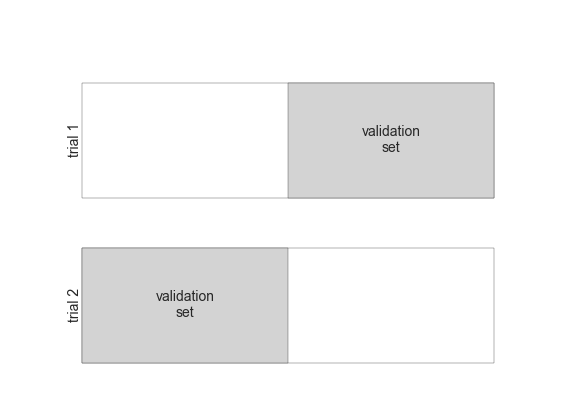

- ở đây, ta sử dụng hai thử nghiệm xác thực, luân phiên sử dụng từng nửa dữ liệu dưới dạng tập hợp loại trừ, nó được triển khai như sau:

In [7]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

- Kết quả thu được là hai giá trị về độ chính xác, mà ta có thể kết hợp (lấy trung bình) để đo lường hiệu suất cua mô hình tổng thể tốt hơn. Hình thức xác thức chéo  này là *two-fold cross validaton* nghĩa là ta chia dữ liệu thành hai bộ và sử dùng từng bộ làm tập xác thực
- từ đây ta có thể mở rộng ý tưởng với sử dụng nhiều thử nghiệm hơn nữa, ví dụ là 5 lần:
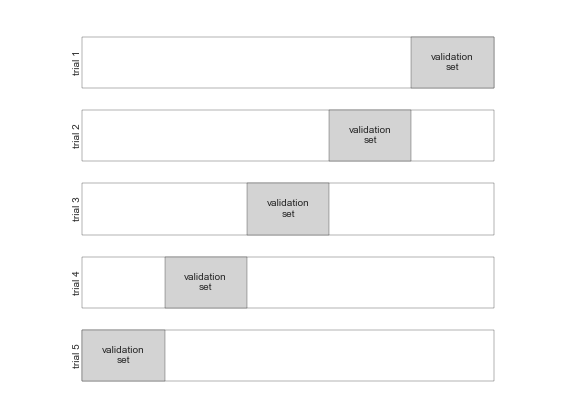

Với ví dụ tiếp theo, ta chia dữ liệu thành 5 nhóm và lần lượt sử dụng từng nhóm để đánh giá mức độ phụ hợp của mô hình trên các dữ liệu còn lại

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

- Với việc lặp lại xác thực trên các tập con khác nhau của dữ liệu cho chúng ta ý tưởng tốt hơn về hiệu suất của thuật toán
- Scikit-Learn thực hiện một số kế hoạch xác thực chéo hữu ích trong các tình huống cụ thể; chúng được triển khai thông qua các trình vòng lặp trong `cross_validation module`. Ví dụ: chúng tôi có thể muốn chuyển sang trường hợp cực đoan trong đó số lần gấp của chúng tôi bằng với số điểm dữ liệu: nghĩa là chúng tôi huấn luyện trên tất cả các điểm trừ một điểm trong mỗi thử nghiệm. Loại xác thực chéo này được gọi là xác thực chéo bỏ qua một lần và có thể được sử dụng như sau:

In [9]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Vì chúng ta có 150 mẫu, việc xác thực chéo loại bỏ một mãu mang lại điểm cho các thử nghiệm và điểm cho cho biết dự đoán thành công hay không [1.0, 0.0] lấy giá trị trung bình của điều này sẽ có ước tính về tỉ lệ lỗi.

In [10]:
scores.mean()

0.96

### Selecting the model
- sau khi đã có những kiến thức cơ bản về xác thực và xác thực chéo, chúng ta sẽ đi sâu hơn một chút về việc lựa chon mô hình và siêu tham số, đây là một trong những khía cạnh quan trọng nhất của học máy.
- điều cốt lõi của vấn đề là câu hỏi sau: * nếu công cụ ước lượng của chúng ta hoạt động kém hiệu quả, chúng ta nên cải tiến thế nào? Có một số câu trả lời như sau:*
1. Use a more complicated/more flexible model - sử dụng mô hình phức tạp/ linh hoạt hơn
2. Use a less complicated/less flexible model - sử dụng mô hình kém phức tạp / kém linh hoạt hơn
3. Gather more training samples - thu thập thêm nhiều mẫu huấn luyện
4. Gather more data to add features to each sample - thu thập thêm nhiều dữ liệu để thêm các đặc trưng cho mẫu
- câu trả lười cho câu hỏi này thường phản trực giác. Đặc biệt, đôi khi sử dụng một mô hình phức tạp hơn sẽ cho kết quả tồi tệ hơn và việc thêm nhiều mẫu huấn luyện hơn có thể không cải thiện kết quả của bạn! Khả năng xác định những bước nào sẽ cải thiện mô hình của bạn là điểm khác biệt giữa những người thực hành ML thành công và không thành công.

### The bias-variance trade-off
Về cơ bản, câu hỏi về "mô hình tốt nhất" là việc tìm ra một điểm tối ưu (sweet spot) trong sự đánh đổi (trade-off) giữa độ chệch (bias) và phương sai (variance). Hình dưới đây sẽ thể hiện 2 phép hồi quy phù hợp với một tập dữ liệu
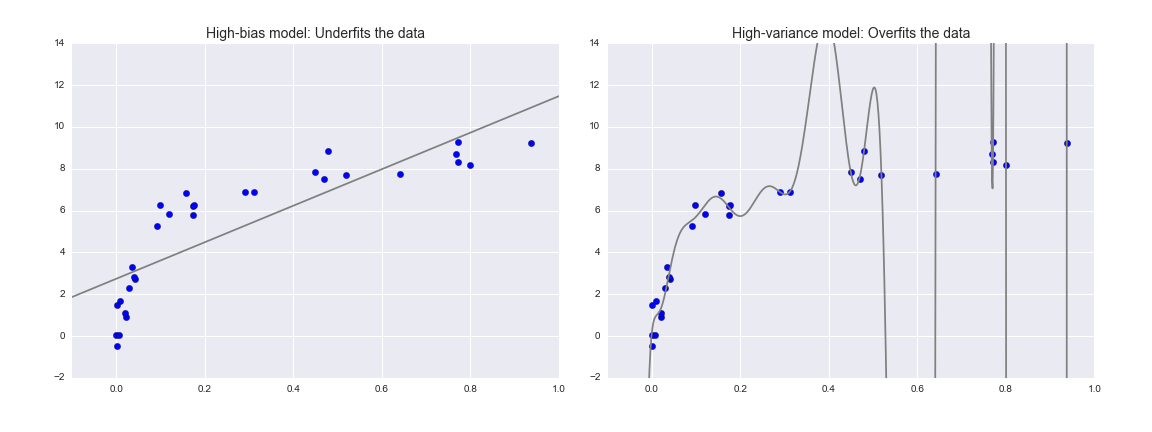
Và cả 2 mô hình đều không phù hợp với dữ, và chúng thất bại theo những cách khác nhau
- Với mô hình bên trái, nó cố gắng tìm một đường thẳng phù hợp với dữ liệu. Do dữ liệu về bản chất phức tạp hơn một đường thẳng nên với mô hình là một đường thẳng sẽ không bao giờ có thể mô tả tốt tập dữ liệu này. Một mô hình như vậy được cho là không phù hợp với dữ liệu: nghĩa là nó không có đủ tính linh hoạt của mô hình để giải thích phù hợp cho tất cả các đặc trưng trong dữ liệu, một cách khác để nói về kiểu mô hình này là mô hình có độc chệch cao (*high bias*)
- Với mô hình bên phải, nó đang cố gắng điều chỉnh đa thức bậc cao thông qua dữ liệu. Ở đây, sự phù hợp của mô hình có đủ tính linh hoạt để giải thích gần như hoàn hảo các đặc trưng của dữ liệu, mặc dù nó mỏ tả rất chính xác dữ liệu huấn luyện, nhưng hình thức chính xác của nó dường như phản ánh nhiều hơn các thuộc tính nhiều cụ thể của dữ liệu hơn là nội tại thuộc tính của bất ky quy trình nào tạo ra dữ liệu đó. Một mô hình như vậy được cho là phù hợp với dữ liệu, tức là tính linh hoạt của mô hình đến mức cuối cùng thì sẽ tính đến các lỗi ngẫu nhiên cũng như phân phối dữ liệu cơ bản, một cách khác để nói về mô hình này là mô hình có phương sai cao (*high variance*)
Để xem xét vấn đề này theo một cách khác, hãy xem điều gì xảy ra nếu chúng ta sử dụng hai mô hình này để dự đoán giá trị y cho một số dữ liệu mới. Ở biểu đồ sau, các điểm màu đỏ biểu thị dữ liệu bị loại ra khỏi tập huấn luyện:
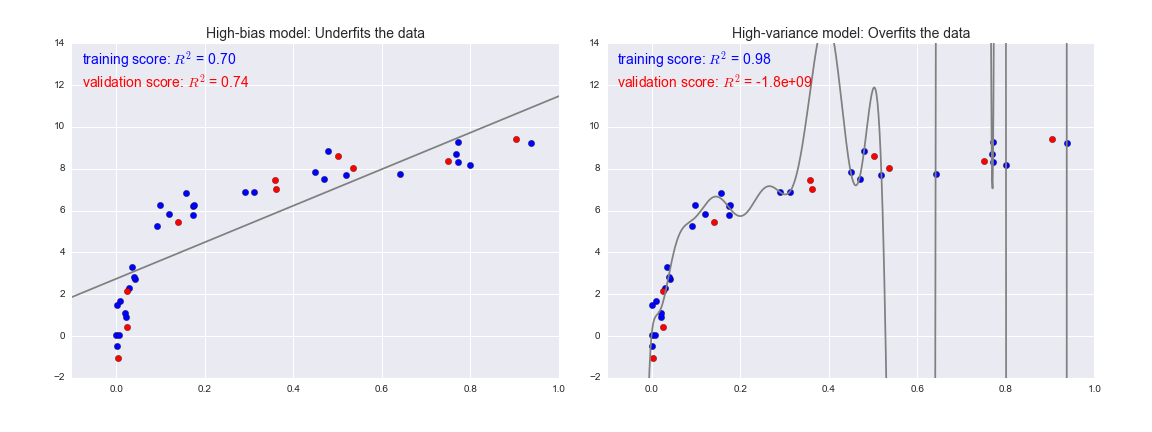
Hệ số ở đây là $R^2$ hay là hệ số xác định (*coefficient of determination*), nó đo mức độ hiệu quả của một mô hình so với giá trị trung bình đơn giản của các giá trị mục tiêu. Nếu $R^2 = 1$ biểu thị một kết hợp hoàn hảo, $R^2 = 0$ cho biết mô hình không tốt hơn là chỉ lấy giá trị trung bình của dữ liệu và các giá trị âm có nghĩa là mô hình thầm chí còn tồi tệ hơn. Từ hệ số liên quan đến hai mô hình này, chúng ta có thể đưa ra một số quan sát tổng quá hơn:
- Đối với các mô hình có độ chệch cao (high-bias models): hiệu suất của mô hình trên tập xác thực tương tự như hiệu suất trên tập huấn luyện (high-bias models): hiệu suất của mô hình trên tập xác thực kếm hơn nhiều so với trên tập huấn luyện
Nếu chúng ta tưởng tượng rằng chúng ta có một số khả năng để điều chỉnh độ phức tạp của mô hình, thì chúng ta sẽ mong đợi điểm huấn luyện và điểm xác nhận sẽ hoạt động như được minh họa trong hình sau:
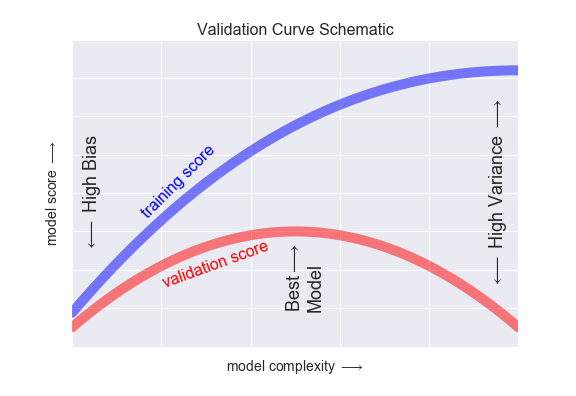
Biểu đồ này thường được gọi là đường xác thực (validation curve, nó cho chúng ta thấy các chức năng sau:
- Hệ số đào tạo ở mọi điểm cao hơn hệ số xác thực. Đây là trường hợp: mô hình sẽ phù hợp với dữ liệu nó thấy hơn là dữ liệu mà nó chưa thấy.
- Đối với mô hinh có độ phức tạp thấp (mô hình có độ chệch cao), dữ liệu đào tạo không phù hợp - dưới khớp (under-fit), có nghĩa là mô hình là công cụ dự đoán kém cho cả dữ liệu nó đâ thấy và chưa từng thấy
- Đối với mô hình có độ phức tạp cao (mô hình có phương sai cao), dữ liệu huấn luyện quá khớp (over-fit), tức là mô hình dữ đoán với dữ liệu rất tốt, nhưng không thành công với bất kì dữ liệu nào mà nó chưa từng thấy trước
- Đối với một số giá trị trung gian, đường cong xác thực này có giá trị tối đa. Mức độ phức tạp này cho thấy sự đánh đổi phù hợp giữa độ chệch và phương sai.
Các phương tiện điều chỉnh độ phức tạp của mô hình thay đổi từ mô hình này sang mô hình khác; khi thảo luận chi tiết về các mô hình riêng lẻ trong các phần sau, chúng ta sẽ xem cách mỗi mô hình cho phép điều chỉnh như vậy.
 

### Validation curve in ScikiScikit-Learn 
Hãy xét một ví dụ về vieech sử dụng xác thực chéo (cross-validation) để tính toán đường cong xác thực (validation curve) cho một lớp mô hình. Ở đây, chúng ta sẽ sử dụng mô hình hồi quy đa thức: đây là mô hình tuyến tính tổng quát trong đó bậc của đa thức là một tham số có thể điều chỉnh được. VD: đa thức bậc nhất khớp với một đường thẳng dữ liệu , cho các tham số mô hình là $a$ và $b$: 
$$
y=ax+b
$$

Hay đa thức bậc 3 khớp với một đường cong dữ liêu, cho các tham số mô hình là $a, b, c, d$:
$$
y = ax^3 + bx^2 + cx + d
$$
Chúng ta có thể khái quát hóa điều này cho bất kỳ số lượng đặc trưng đa thức nào. Trong Scikit-Learn, chúng ta có thể thực hiện điều này bằng hồi quy tuyến tính đơn giản kết hợp với bộ tiền xử lý đa thức. Chúng tôi sẽ sử dụng một quy trình để xâu chuỗi các hoạt động này lại với nhau (chúng tôi sẽ thảo luận về các tính năng và quy trình đa thức đầy đủ hơn trong bài `Feature Engineering`:

In [11]:

plt.rcParams["figure.figsize"] = (12,8)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [12]:
### khoi tao du lieu

def make_data(N, err=1.0, rseed=1):
    # randomly sample data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err + rng.randn(N)
    return X, y

X, y = make_data(40)

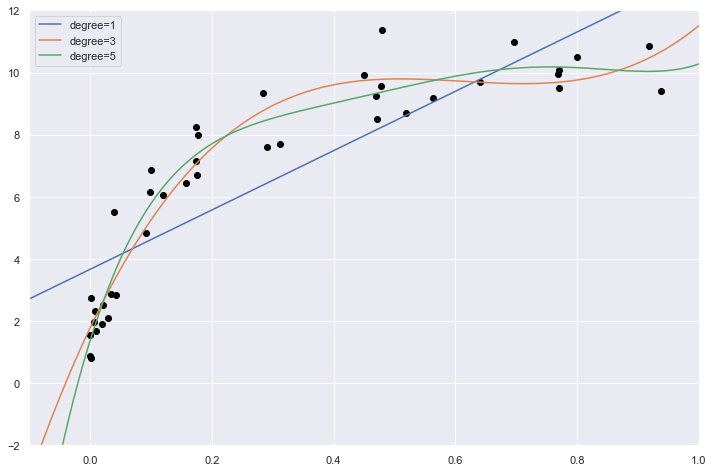

In [13]:
### visualizing
import seaborn
seaborn.set() # plot formating

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

for degree in (1, 3, 5):
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


Nút kiểm soát độ phức tạp của mo hình trong trường hợp này là bậc của đa thức, nó có thể là bất kì số nguyên không âm nào. Một câu hỏi hữu ích để trả lời là: mức độ đa thức nào cung cấp sự đánh đổi (trade-off) giữa độ lệch (under-fitting) và phương sai (over-fitting)
Chúng ta có thể đạt được sự tiến bộ trong việc này bằng cách trực quan hoá đường cong xác thực cho tập dữ liệu và mo hình cụ thể này. Ta thực hiện điều này bằng cách vận dụng scikit-learn đó là validation-curve. Đưa ra một mô hình, dữ liệu, tên tham số và một phạm vi để khám phá, hàm này sẽ tính toán cả hệ số đào tạo và hệ số xác thực (training score and validation score) trên phạm vi

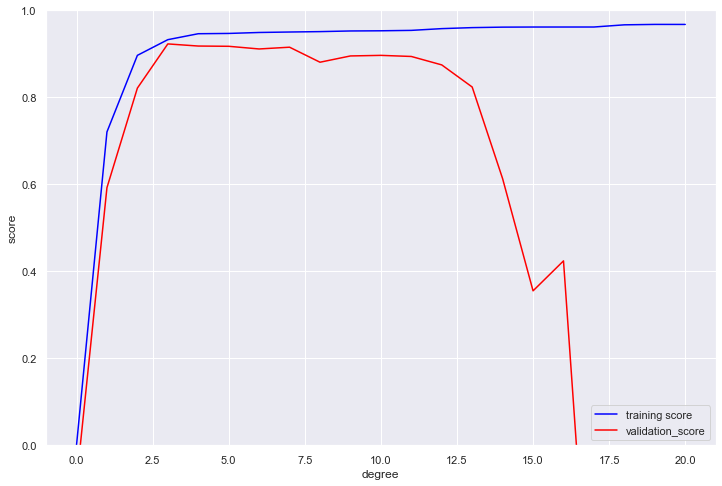

In [14]:

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', 
                                          param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation_score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Điều này cho thấy chính xác hành vi định tính mà ta mong đợi: các điểm tạo tạo ở mọi vị trí luôn cao hơn điểm xác thực, điểm đào tạo được cải thiện một cách đơn điệu với độ phức tạp của mô hình tăng lên, và điểm xác thực đạt mức tối đa trước khi giảm xuống khi mô hình quá khớp (overfit)
Từ đường cong xác thực, ta có thể thấy rằng, trade-off giữa độ lệch và phương sai được tìm lấy là đa thức bậc 3, chúng ta có thể tính toán và hiển thị sự phù hợp này trên dữ liệu gốc như sau:

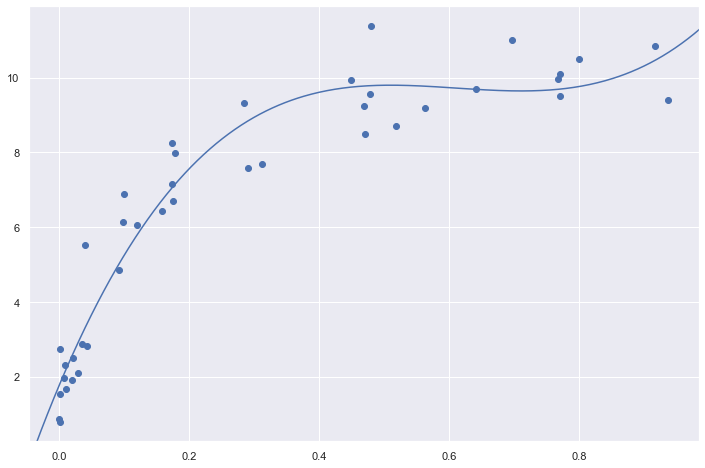

In [15]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

*Lưu ý*: việc tìm ra mô hình tối ưu này  không thực sự yêu cầu chúng ta tính đoán hệ số huấn luyện, nhưng việc kiểm tra mối quan hệ giữa hệ số huấn luyện và hệ số xác thực có thể cho ta cái nhìn sau sắc hơn về hiệu suất của mô hình.

### Learning Curve
- Một khía cạnh quan trọng của đọ phức tạp mô hình là mô hình tối ưu nói chung sẽ phụ thuộc vào kích thước dữ liệu huấn luyện, ví dụ như sau:


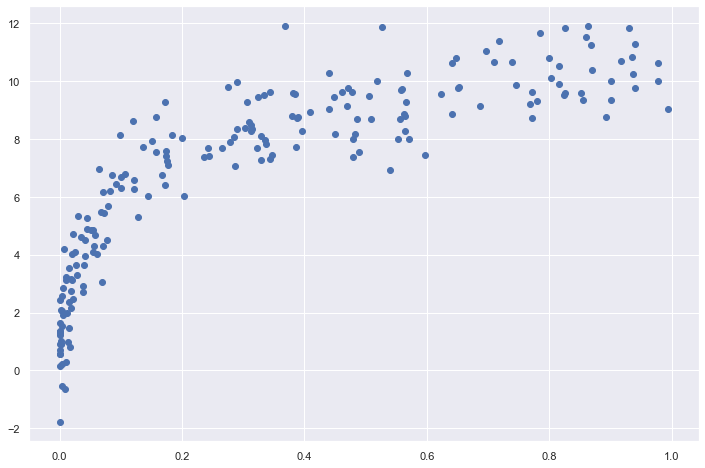

In [17]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

Chúng ta sẽ sử dụng code của phần trước để tiến hành vẽ các đường cho bộ dữ liệu lớn hơn này.

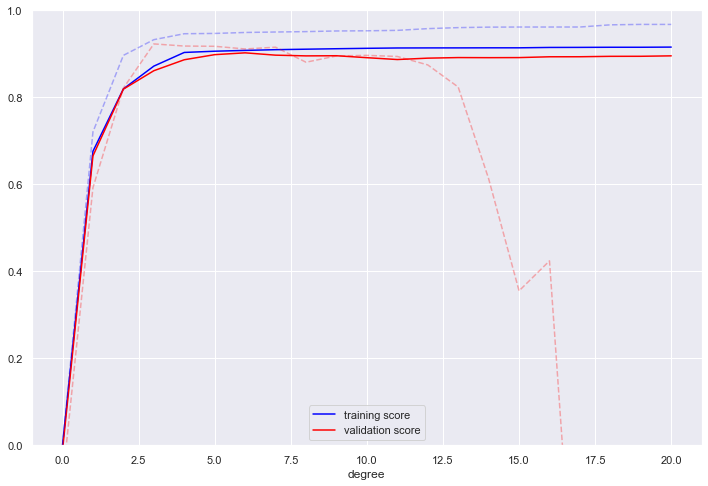

In [35]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                           param_name='polynomialfeatures__degree',
                                            param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed');
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel=('score');


Các đường nét liền hiển thị kết quả với bộ dữ liệu mới, còn các đường nét đứt và mờ hơn sẽ hiển thị của bộ dữ liệu cũ nhỏ hơn. Rõ ràng từ đường cong xác thực, thấy rằng dữ liệu lớn hơn có thể hỗ trợ một mô hình phức tạp hơn nhiều: đỉnh ở đây là ở khoảng bậc 6, nhưng ngay cả mô hinh bậc 20 cũng bị overfit với dữ liệu từ hệ số xác nhận và huấn luyện, 2 hệ số này rất gần

Do đó chúng ta thấy rằng hành vi của đường cong xác thực không chỉ có một mà có 2 yếu tố đầu vào quan trọng là: độ phức tạp của mô hình và số điểm huấn luyện. Việc khám phá hành vi của mô hình như một hàm của hệ số huấn luyện thường hữu ích, điều mà chúng ta có thể thực hiện bằng cách sử dụng các tập con dữ liệu ngày càng lớn hơn để phù hợp với mô hình của mình. Đồ thị của điểm đào tạo/xác nhận tương ứng với kích thước tập huấn luyện được gọi là đường cong học tập (learning curve)

Hành vi chung mà chúng ta mong đợi từ đường cong học tập là:
- Một mô hình có độ phức tạp nhất định sẽ phù hợp với một tập dữ liệu nhỏ(overfit): điều này nghĩa là điểm huấn luyện sẽ tương đối cao, còn điểm xác thực sẽ tương đối thấp
- Một mô hình có độ phức tạp nhất định sẽ không phù hợp với tập dữ liệu lớn (underfit):có nghĩa là diểm đào tạo sẽ giảm nhưng điểm xác nhận sẽ tăng
- Một mô hình sẽ không bao cho điểm xác thức cao hơn điểm huấn luyện (trừ trường hợp ngẫu nhiên): điều này có nghĩa là 2 đường cong sẽ luôn tịnh tiến về gần nhau nhưng không bao giờ cắt nhau
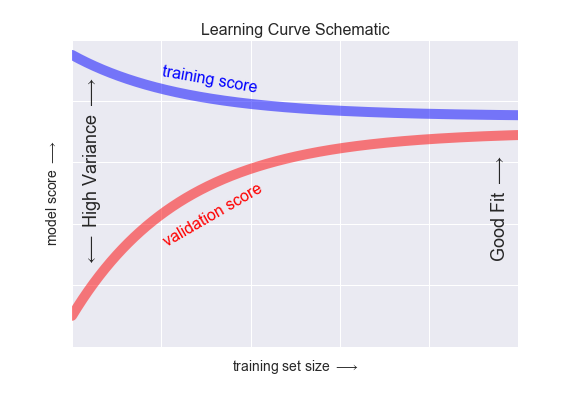
Một đặc trưng đáng chú ý của đường cong học tập (learning curve) là sự hội tụ đến một số điểm cụ thể khi số lượng mẫu đào tạo tăng lên. Đặc biệt, một khi bạn đã có đủ sô điểm mà một mô hình cụ thể đã hội tụ thì việc thêm dữ liệu mới vào sẽ không giúp ích gì cho bạn. cách duy nhất để tăng hiệu suat trong trường hợp này là sử dụng một mô hình khác (thường sẽ phức tạp hơn) 

### Learning curve in Scikit-learn
Scikit-Learn cung cấp một tiện ích thuận tiện để tính toán các đường cong học tập như vậy từ các mô hình của bạn; ở đây, chúng tôi sẽ tính toán một đường cong học tập cho tập dữ liệu gốc của chúng tôi với mô hình đa thức bậc hai và đa thức bậc chín:

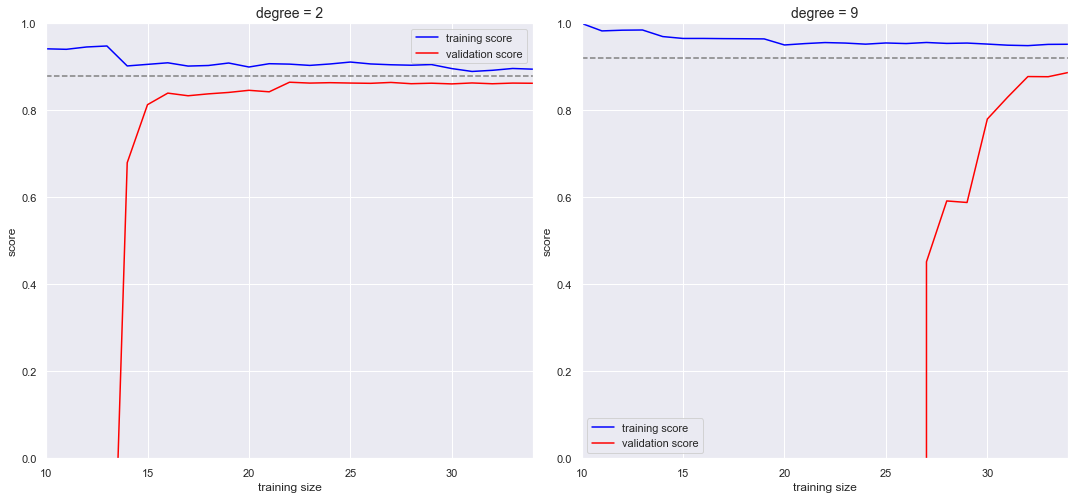

In [40]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate ([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, 
                                        cv=7, train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title(f'degree = {degree}', size=14)
    ax[i].legend(loc='best')

Có thể thấy đây là một chuẩn đoán có giá trị vì nó cho chúng ta mô tả trực quan về cách mô hình của chúng ta phản ứng với việc tăng dữ liệu huấn luyện. Đặc biêt khi đường cong học tập hội tụ (đường cong xác thực và huấn luyện gần nhau), thì việc thêm nhiều dữ liệu đào tạo sẽ không cải thiện đáng kể mức độ phù hợp. Tình huống này ta thấy ở đồ thị bên trái với đường cong học tập của mô hinh bậc 2
Cách duy nhất để tăng điểm hội tụ là sử dụng một mô hình khác (thường phức tạp hơn). Chúng ta thấy điều này trong đồ thị bên phải: bằng cách chuyển sang  mô hình phức tạp hơn nhiều, điểm hội tu tăng (được mô tả bằng các đường nét đứt), nhưng phải đánh đổi với vấn đề phương sai của mô hình cao hơn (được biêu thị bằng sự khác biệt giữa điểm đào tạo và điểm xác thực). Nếu chúng ta thêm nhiều điểm dữ liệu hơn nữa thì đườn cong học tập cho mô hình phức tạp hơn cũng sẽ hội tụ

Vẽ sơ đồ đường cong học tập cho lựa chọn mô hình và tập dữ liệu cụ thể của bạn có thể giúp bạn đưa ra loại quyết định này về cách tiến lên trong việc cải thiện phân tích của mình.

### Validation Practice: Grid search
Các ví dụ ở phần trược đã cung cấp cho là một số trực quan về trade-off giữa bias và variance và sự phụ thuộc của nó vào độ phức tạp mô hình và độ lớn của tập huấn luyện. Trong thực tế, các mô hình thường có nhiều hơn một núm xoay, do đó biểu đồ xác thực và đường cong học tập thay đổi từ đường kẻ sang bề mặt đa chiều. Trong trường hợp này, những hình dung như vây rất khó và chúng ta đơn giản phải tìm ra mô hình cụ thể giúp tối đa hoá các điểm xác thực: 

Scikit-Learn cung cấp các công cụ tự động để thực hiện việc này trong mô-đun tìm kiếm dạng lưới. Dưới đây là một ví dụ về việc sử dụng tìm kiếm lưới để tìm mô hình đa thức tối ưu. Chúng ta sẽ khám phá một lưới ba chiều các tính năng của mô hình; cụ thể là bậc đa thức, cờ cho chúng ta biết có phù hợp với phần chặn hay không và cờ cho chúng ta biết có nên bình thường hóa vấn đề hay không. Điều này có thể được thiết lập bằng cách sử dụng công cụ ước tính meta `GridSearchCV` của Scikit-Learn:

In [42]:
from sklearn.model_selection import GridSearchCV

pram_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), pram_grid, cv=7)

In [50]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

D:\INSTALL\anacoda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


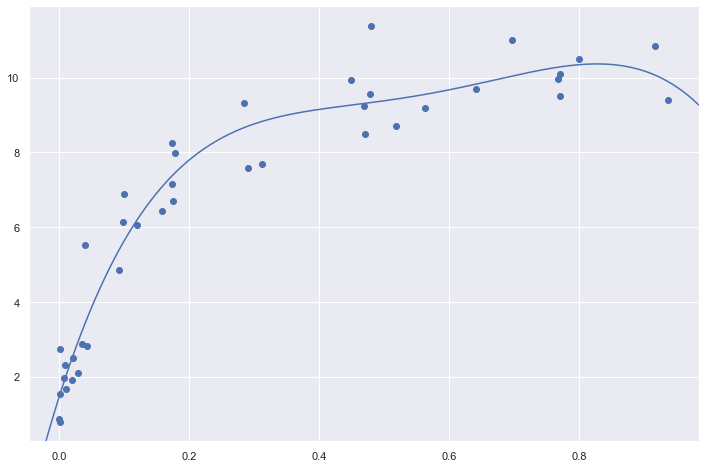

In [51]:

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Summary
Trong phần này, chúng ta đã bắt đầu khám phá khái niệm xác thực mô hình và tối ưu hóa siêu tham số, tập trung vào các khía cạnh trực quan của trade-off độ lệch-phương sai và cách nó phát huy tác dụng khi khớp mô hình với dữ liệu. Cụ thể, chúng tôi nhận thấy rằng việc sử dụng bộ xác thực hoặc phương pháp xác thực chéo là rất quan trọng khi điều chỉnh các tham số để tránh khớp quá mức cho các mô hình phức tạp/linh hoạt hơn.

Trong các phần sau, chúng ta sẽ thảo luận chi tiết về các mô hình đặc biệt hữu ích và xuyên suốt sẽ nói về những gì điều chỉnh có sẵn cho các mô hình này và cách các tham số miễn phí này ảnh hưởng đến độ phức tạp của mô hình. Hãy ghi nhớ các bài học của phần này khi bạn đọc tiếp và tìm hiểu về các phương pháp học máy này!